In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # train processing, CSV file I/O (e.g. pd.read_csv)

# Input train files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

gender_submission.csv
test.csv
train.csv



In [20]:
rng = np.random.RandomState(4711)

train = pd.read_csv('../input/train.csv')

print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
test = pd.read_csv('../input/test.csv')

print(test.shape)
test.head()



(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
prediction = pd.DataFrame(test['PassengerId'], columns=['PassengerId'])

prediction.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


# Visualize training data

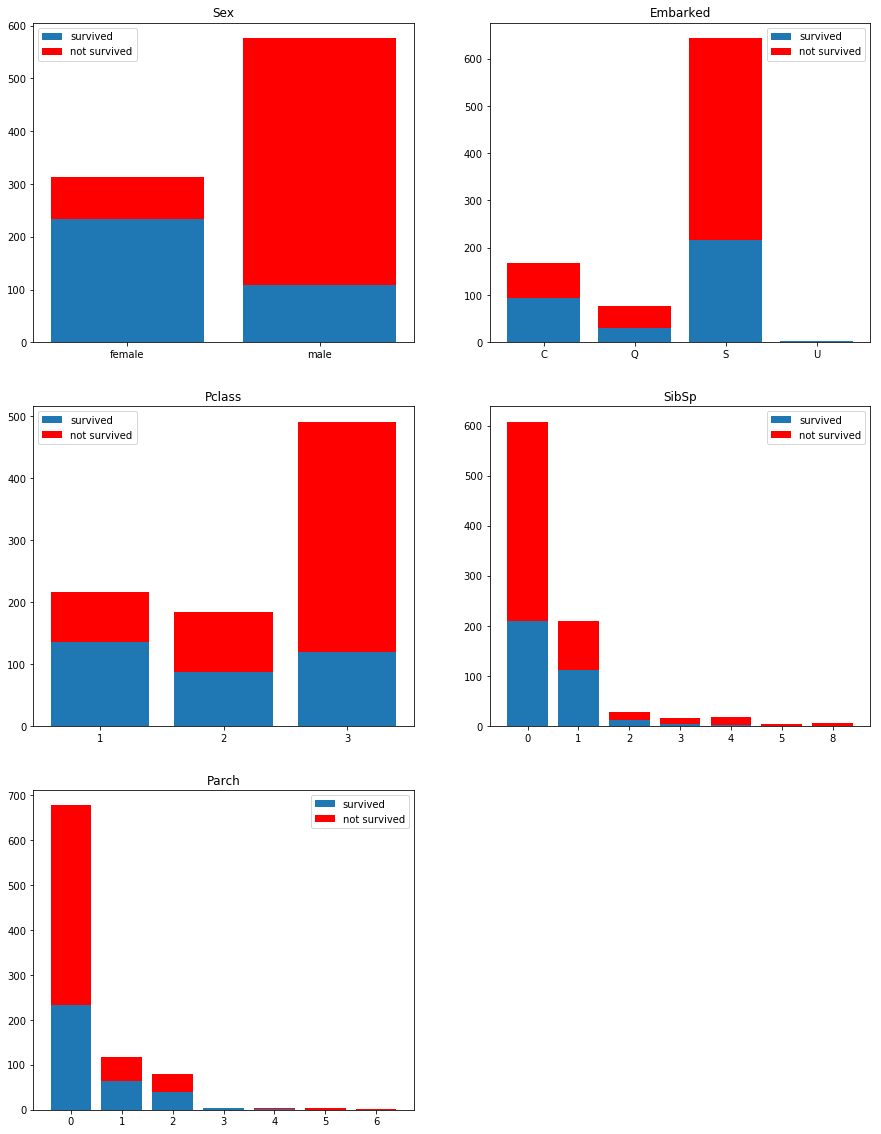

In [23]:
import matplotlib.pyplot as plt
import numpy as np


train['Embarked'].fillna('U', inplace=True)
columns = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

plt.figure(figsize=(15,20))


for idx, column in enumerate(columns):
    values = train[column].unique()
    values.sort(axis=0)
        
    ind = np.arange(len(values))


    survived = train.loc[train['Survived'] == True].groupby(column).agg('count')['Survived']
    not_survived = train.loc[train['Survived'] == False].groupby(column).agg('count')['Survived']

    for value in values:
        if (value not in survived.index.unique()):
            survived[value] = 0
        if (value not in not_survived.index.unique()):
            not_survived[value] = 0
               
    plt.subplot(round(len(columns)/2)+1,2,idx+1)  
                
    plt.bar(ind, survived)
    plt.bar(ind, not_survived, color='r', bottom=survived)
    plt.xticks(ind,values)
    plt.legend(('survived', 'not survived'))
    plt.title(column)
plt.show()

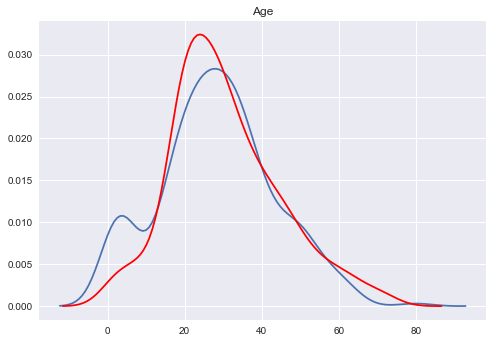

In [54]:
import seaborn as sns
sns.set(color_codes=True)


survived = train.loc[train['Survived'] == 1, 'Age'].dropna().sort_values().values
not_survived = train.loc[train['Survived'] == 0, 'Age'].dropna().sort_values().values

sns.distplot(survived, hist = False)
sns.distplot(not_survived, color='red', hist= False)
sns.plt.title('Age')
plt.show()



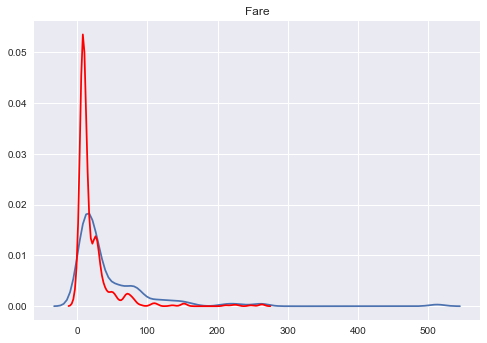

In [53]:
import seaborn as sns
sns.set(color_codes=True)


survived = train.loc[train['Survived'] == 1, 'Fare'].dropna().sort_values().values
not_survived = train.loc[train['Survived'] == 0, 'Fare'].dropna().sort_values().values

sns.distplot(survived, hist = False)
sns.distplot(not_survived, color='red', hist= False)
sns.plt.title('Fare')

plt.show()



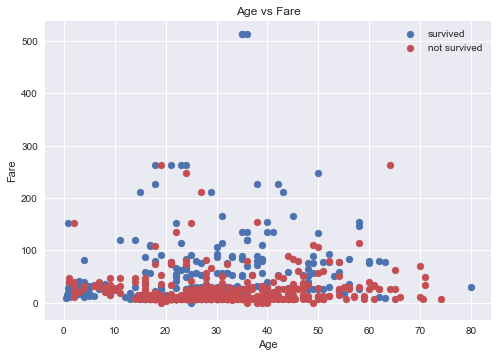

In [59]:
plt.scatter(train.loc[train['Survived'] == 1, 'Age'], train.loc[train['Survived'] == 1, 'Fare'])
plt.scatter(train.loc[train['Survived'] == 0, 'Age'], train.loc[train['Survived'] == 0, 'Fare'],color='r')
plt.legend(('survived', 'not survived'))
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


# Preprocess data

In [6]:
remove_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train = train.drop(remove_columns, axis = 1)
print(train.shape)
train.head()


(891, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
test = test.drop(remove_columns, axis = 1)
print(test.shape)
test.head()


(418, 7)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


## Prepare Embarked

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder()


train['Embarked'].fillna('U', inplace=True)
embarked_values = train['Embarked'].unique()
embarked_values.sort(axis=0)

train['Embarked'] = labelencoder.fit_transform(train['Embarked'])
embarked_onehot = onehotencoder.fit_transform(train['Embarked'].values.reshape(-1,1))

embarked_columns = pd.DataFrame(embarked_onehot.todense())
embarked_columns.iloc[:,0:-1]

train[embarked_values[:-1]] = embarked_columns.iloc[:,0:-1]
train = train.drop(['Embarked'], axis = 1)

print(train.shape)
train.head()

(891, 10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,male,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,0.0,0.0,1.0


In [9]:

test['Embarked'].fillna('U', inplace=True)
embarked_values = test['Embarked'].unique()
embarked_values.sort(axis=0)

test['Embarked'] = labelencoder.fit_transform(test['Embarked'])
embarked_onehot = onehotencoder.fit_transform(test['Embarked'].values.reshape(-1,1))

embarked_columns = pd.DataFrame(embarked_onehot.todense())
embarked_columns.iloc[:,0:-1]

test[embarked_values[0:]] = embarked_columns
test = test.drop(['Embarked'], axis = 1)

print(test.shape)
test.head()

(418, 9)


,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,male,34.5,0,0,7.8292,0.0,1.0,0.0
1,3,female,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,male,62.0,0,0,9.6875,0.0,1.0,0.0
3,3,male,27.0,0,0,8.6625,0.0,0.0,1.0
4,3,female,22.0,1,1,12.2875,0.0,0.0,1.0


## Prepare Sex

In [10]:
train['Sex'].fillna('U', inplace=True)
sex_values = train['Sex'].unique()
sex_values.sort(axis=0)

train['Sex'] = labelencoder.fit_transform(train['Sex'])

print(train.shape)
train.head()

(891, 10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [11]:
test['Sex'].fillna('U', inplace=True)
sex_values = test['Sex'].unique()
sex_values.sort(axis=0)

test['Sex'] = labelencoder.fit_transform(test['Sex'])

print(test.shape)
test.head()

(418, 9)


,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,34.5,0,0,7.8292,0.0,1.0,0.0
1,3,0,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,1,62.0,0,0,9.6875,0.0,1.0,0.0
3,3,1,27.0,0,0,8.6625,0.0,0.0,1.0
4,3,0,22.0,1,1,12.2875,0.0,0.0,1.0


## Prepare Age

In [12]:
age_mean = train['Age'].mean()
train['Age'] = train['Age'].fillna(age_mean)


In [13]:
test['Age'] = test['Age'].fillna(age_mean)

## Prepare Fare

In [14]:
fare_mean = train['Fare'].mean()
train['Fare'] = train['Fare'].fillna(fare_mean)


In [15]:
test['Fare'] = test['Fare'].fillna(fare_mean)


# Use Random Forest Model

In [16]:
print(train.shape)
train = train.dropna()
print(train.shape)
train.head()

(891, 10)
(891, 10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [17]:
y = train['Survived']
print(y.shape)
y.head()

(891,)


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [18]:
X = train.drop(['Survived'], axis = 1)
print(X.shape)
X.head()

(891, 9)


,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

param_grid = {
                 'n_estimators': [5, 10, 15, 20, 30],
                 'max_depth': [2, 5, 7, 9, 13]
             }

clf = RandomForestClassifier(random_state=rng)


grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(X, y)

best_clf = grid_clf.best_estimator_

best_clf


/Users/briner/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/briner/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False,
            random_state=<mtrand.RandomState object at 0x1185aed80>,
            verbose=0, warm_start=False)

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_clf, X, y, cv=10)
print(scores.mean())

0.829521620701


In [21]:
y_pred = best_clf.predict(test)

In [22]:
prediction['Survived'] = y_pred
print(prediction.shape)
prediction.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [23]:
prediction.to_csv('../output/Titanic-02.csv', index=False)